LOADING THE DATA

In [ ]:
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load the data from a text file
file_path = 'troubleshooting_data.csv'
df = pd.read_csv(file_path)  # Assuming the text file is tab-delimited

# Display the first few rows of the DataFrame
print(df.head())


     Device Type      Symptom Description  \
0         Router      Slow internet speed   
1        Printer        Prints are blurry   
2             TV        Screen flickering   
3         Router  Frequent disconnections   
4  Digital Watch   Not syncing with phone   

                                            Solution  
0  Check for bandwidth-heavy applications. Change...  
1  Clean the printhead. Replace the ink cartridge...  
2  Check the power supply and cables. Update the ...  
3    Restart the router. Check for firmware updates.  
4  Restart both devices. Ensure Bluetooth is enab...  


check for missing values

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Removing rows with missing values
df = df.dropna()

# Displaying the updated DataFrame
df.head()


,Device Type,Symptom Description,Solution
0,Router,Slow internet speed,Check for bandwidth-heavy applications. Change...
1,Printer,Prints are blurry,Clean the printhead. Replace the ink cartridge...
2,TV,Screen flickering,Check the power supply and cables. Update the ...
3,Router,Frequent disconnections,Restart the router. Check for firmware updates.
4,Digital Watch,Not syncing with phone,Restart both devices. Ensure Bluetooth is enab...


dropping the null values

nomalizing and cleaning the Text values

In [ ]:
import string

# Function to normalize text
def normalize_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Apply text normalization
df['Symptom Description'] = df['Symptom Description'].apply(normalize_text)
df['Solution'] = df['Solution'].apply(normalize_text)

# Display the updated DataFrame
df.head()


,Device Type,Symptom Description,Solution
0,Router,slow internet speed,check for bandwidthheavy applications change w...
1,Printer,prints are blurry,clean the printhead replace the ink cartridge ...
2,TV,screen flickering,check the power supply and cables update the f...
3,Router,frequent disconnections,restart the router check for firmware updates
4,Digital Watch,not syncing with phone,restart both devices ensure bluetooth is enabl...


Data tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK data files (only need to run once)
nltk.download('punkt')

# Tokenize the text data
df['Symptom Tokens'] = df['Symptom Description'].apply(word_tokenize)
df['Solution Tokens'] = df['Solution'].apply(word_tokenize)

# Display the updated DataFrame
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Device Type,Symptom Description,Solution,Symptom Tokens,Solution Tokens
0,Router,slow internet speed,check for bandwidthheavy applications change w...,"[slow, internet, speed]","[check, for, bandwidthheavy, applications, cha..."
1,Printer,prints are blurry,clean the printhead replace the ink cartridge ...,"[prints, are, blurry]","[clean, the, printhead, replace, the, ink, car..."
2,TV,screen flickering,check the power supply and cables update the f...,"[screen, flickering]","[check, the, power, supply, and, cables, updat..."
3,Router,frequent disconnections,restart the router check for firmware updates,"[frequent, disconnections]","[restart, the, router, check, for, firmware, u..."
4,Digital Watch,not syncing with phone,restart both devices ensure bluetooth is enabl...,"[not, syncing, with, phone]","[restart, both, devices, ensure, bluetooth, is..."


Removing the stop words

In [ ]:
from nltk.corpus import stopwords

# Download NLTK stopwords (only need to run once)
nltk.download('stopwords')

# Remove stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a list of tokens
def remove_stop_words(tokens):
    return [token for token in tokens if token not in stop_words]

# Apply stop words removal
df['Symptom Tokens'] = df['Symptom Tokens'].apply(remove_stop_words)
df['Solution Tokens'] = df['Solution Tokens'].apply(remove_stop_words)

# Display the updated DataFrame
df.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Device Type,Symptom Description,Solution,Symptom Tokens,Solution Tokens
0,Router,slow internet speed,check for bandwidthheavy applications change w...,"[slow, internet, speed]","[check, bandwidthheavy, applications, change, ..."
1,Printer,prints are blurry,clean the printhead replace the ink cartridge ...,"[prints, blurry]","[clean, printhead, replace, ink, cartridge, ne..."
2,TV,screen flickering,check the power supply and cables update the f...,"[screen, flickering]","[check, power, supply, cables, update, firmware]"
3,Router,frequent disconnections,restart the router check for firmware updates,"[frequent, disconnections]","[restart, router, check, firmware, updates]"
4,Digital Watch,not syncing with phone,restart both devices ensure bluetooth is enabl...,"[syncing, phone]","[restart, devices, ensure, bluetooth, enabled,..."


##converting data to suitable format for model training
To convert the cleaned and preprocessed text data into a suitable format for model training, we typically use techniques like Bag-of-Words (BoW) or TF-IDF (Term Frequency-Inverse Document Frequency) representation. Here's how you can do it using TF-IDF in another code cell

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokens back into a single string
df['Symptom Cleaned'] = df['Symptom Tokens'].apply(lambda tokens: ' '.join(tokens))
df['Solution Cleaned'] = df['Solution Tokens'].apply(lambda tokens: ' '.join(tokens))

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'Symptom Cleaned' data
X_symptoms = vectorizer.fit_transform(df['Symptom Cleaned'])

# Fit and transform the 'Solution Cleaned' data (if needed for model training)
X_solutions = vectorizer.fit_transform(df['Solution Cleaned'])

# Convert the transformed data to DataFrame for easier handling
df_symptoms = pd.DataFrame(X_symptoms.toarray(), columns=vectorizer.get_feature_names_out())
df_solutions = pd.DataFrame(X_solutions.toarray(), columns=vectorizer.get_feature_names_out())

# Display the transformed data
df_symptoms.head()


DATA VISUALIZATION

THE HISTOGRAM

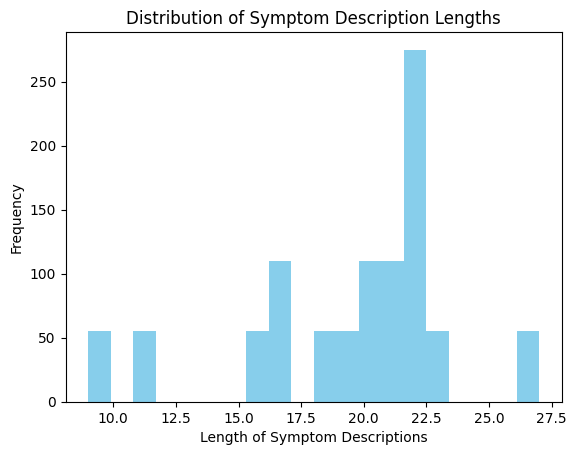

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram of symptom description lengths
plt.hist(df['Symptom Description'].apply(len), bins=20, color='skyblue')
plt.xlabel('Length of Symptom Descriptions')
plt.ylabel('Frequency')
plt.title('Distribution of Symptom Description Lengths')
plt.show()


BAR PLOT FOR DEVICE TYPE

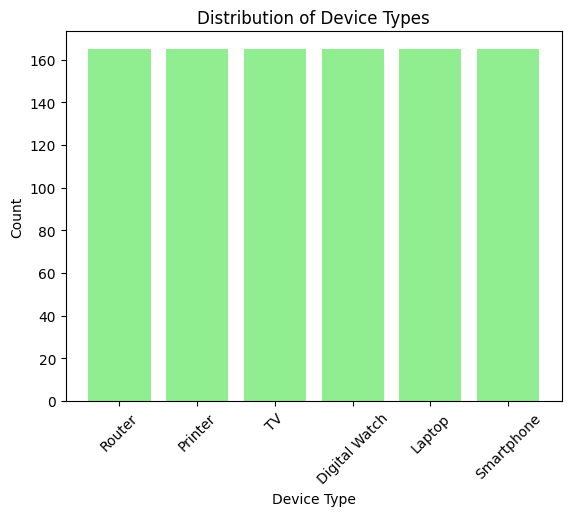

In [ ]:
# Plot bar plot of device types
device_counts = df['Device Type'].value_counts()
plt.bar(device_counts.index, device_counts.values, color='lightgreen')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.title('Distribution of Device Types')
plt.xticks(rotation=45)
plt.show()


WORD CLOUD VIEW FOR SYMPTOM

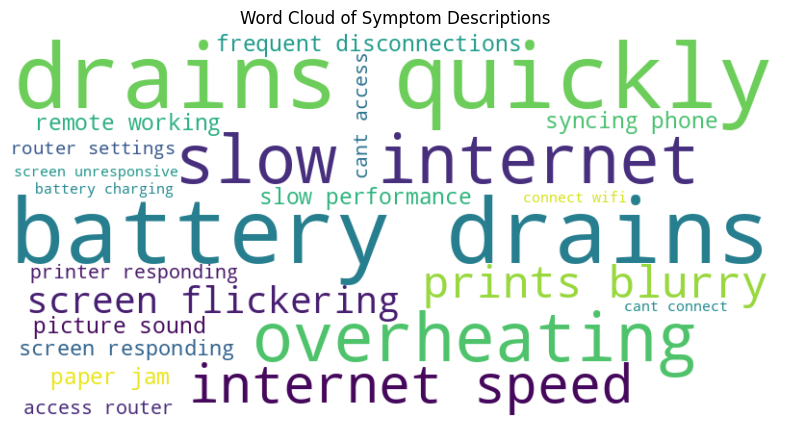

In [ ]:
from wordcloud import WordCloud

# Generate word cloud for symptom descriptions
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Symptom Cleaned']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Symptom Descriptions')
plt.show()


SCATTER PLOTTING

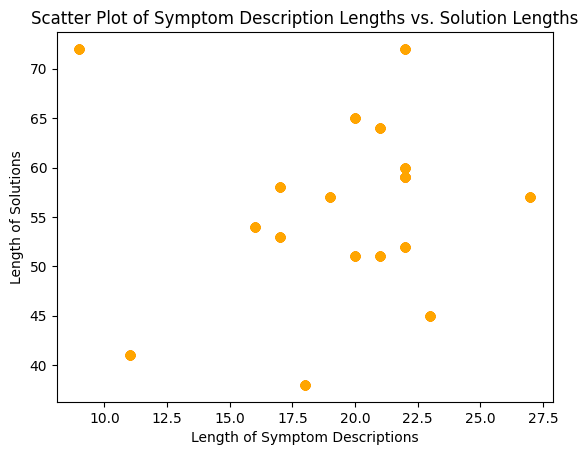

In [ ]:
# Plot scatter plot of symptom description lengths vs. solution lengths
plt.scatter(df['Symptom Description'].apply(len), df['Solution'].apply(len), color='orange', alpha=0.5)
plt.xlabel('Length of Symptom Descriptions')
plt.ylabel('Length of Solutions')
plt.title('Scatter Plot of Symptom Description Lengths vs. Solution Lengths')
plt.show()


HISTOGRAM NORMAL DISTRIBUTION

In [ ]:
import scipy.stats as stats

# Fit a normal distribution to the data
mu, std = stats.norm.fit(s)

# Plot the probability density function
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Probability Density Plot of Data Generated from Normal Distribution')
plt.grid(True)
plt.show()


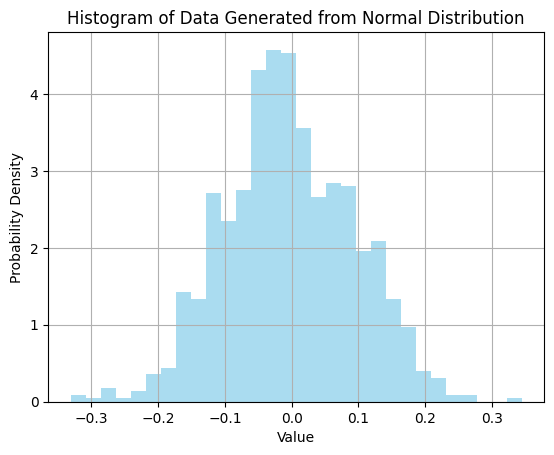

In [ ]:
import numpy as np

# Generate random data following a normal distribution
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

# Plot histogram of the generated data
plt.hist(s, bins=30, density=True, color='skyblue', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Histogram of Data Generated from Normal Distribution')
plt.grid(True)
plt.show()


In [ ]:
from google.colab import files

# Specify the file paths of the CSV files
csv_file_paths = ['cleaned_troubleshooting_data.csv']

# Download each CSV file
for file_path in csv_file_paths:
    files.download(file_path)



In [ ]:
from google.colab import files

# Specify the file paths of the CSV files
csv_file_paths = ['cleaned_troubleshooting_data.csv']

# Download each CSV file
for file_path in csv_file_paths:
    files.download(file_path)
